José Luis Roberto Zárate Cortés (000183347)
### **Semana 3; Clase 3_algebra_lineal, 3_minimos_cuadrados**
### _Lineales, No Lineales y Error Cuadrático Medio._
1. Regresión Lineal, Modelo sin Intercepto.  
Ejercicio: realizar el ajuste correspondiente para este caso con QR.  
Se ajusta un modelo de la forma: $f(x|\beta)=\beta_1x$ a los datos $(x_i, y_i)$'s $\forall  i=0,1,...,m$.  
**Obs:** En este caso se elige $\phi_1(x)=x$ y no hay $\phi_0$ por lo que sólo se tiene que estimar $\beta_1$.  
_Nota:_ debido a lo mencionado en la Obs., no es posible utilizar la Mat A necesaria para el método QR. Por esta razón se utiliza el modelo general $A^{T}A\beta=A^Ty$.  
2. Error cuadrático medio: calcular el ECM de los ajustes anteriores (regresión lineal con y sin intercepto)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
np.set_printoptions(precision = 3)

**DATOS DEL EJEMPLO**

In [2]:
np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

Text(0.5, 1.0, 'Puntos ejemplo')

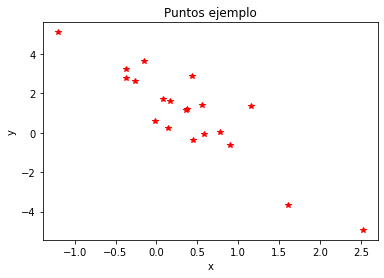

In [3]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')

**Ajuste de modelos**

In [4]:
# Modelo QR con intercepto

A=np.ones((mpoints,2))
A[:,1] = x

Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)
y_ajustadas_QR = A@beta

# Modelo sin intercepto

VA=x
m2beta=(VA.T@y)/(VA.T@VA)
y_ajustadas_m2 = VA*m2beta

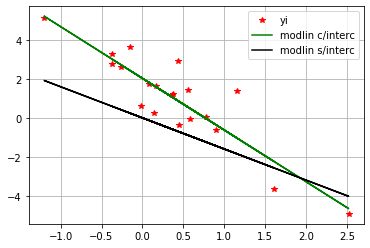

In [5]:

plt.plot(x, y, 'r*',x, y_ajustadas_QR , 'g-',x, y_ajustadas_m2 , 'k-')
plt.legend(['yi','modlin c/interc','modlin s/interc'], loc='best')
plt.grid()

**ECM**

In [6]:
ECM=1/(y.shape[0]-1)*sum((y-y_ajustadas_QR)**2)
ECMm2=1/(y.shape[0]-1)*sum((y-y_ajustadas_m2)**2)
print('El error cuadrático medio para el modelo con intercepto es:',ECM)
print('El error cuadrático medio para el modelo sin intercepto es:',ECMm2)

El error cuadrático medio para el modelo con intercepto es: 1.075551412567152
El error cuadrático medio para el modelo sin intercepto es: 4.5402705888071395


**Conclusiones:**
Observemos que el modelo sin intercepto tiene un ECM mayor debido a que la "nube" de datos está lejana al orígen, por lo podemos concluir que este modelo debe ser utilizado bajo tal condición.